## Importing Necessary Libaries

In [1]:
# Import 'numpy' and 'pandas' to work with numbers and dataframes
import numpy as np
from keras import layers
from keras.layers import Input,Add,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D,AveragePooling2D,MaxPooling2D
from keras.models import Model,load_model
from keras.preprocessing import image

from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG

from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow


## Loading the data

In [2]:
#  write the  code for mounting your Google Drive
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
#write the code for unzipping the data and storing it in Google Drive
!unzip /content/weatherdata.zip

Archive:  /content/weatherdata.zip
   creating: weather/test/
   creating: weather/test/cloudy/
  inflating: weather/test/cloudy/cloudy1.jpg  
  inflating: weather/test/cloudy/cloudy103.jpg  
  inflating: weather/test/cloudy/cloudy107.jpg  
  inflating: weather/test/cloudy/cloudy112.jpg  
  inflating: weather/test/cloudy/cloudy158.jpg  
  inflating: weather/test/cloudy/cloudy178.jpg  
  inflating: weather/test/cloudy/cloudy185.jpg  
  inflating: weather/test/cloudy/cloudy202.jpg  
  inflating: weather/test/cloudy/cloudy22.jpg  
  inflating: weather/test/cloudy/cloudy257.jpg  
  inflating: weather/test/cloudy/cloudy267.jpg  
  inflating: weather/test/cloudy/cloudy275.jpg  
  inflating: weather/test/cloudy/cloudy283.jpg  
  inflating: weather/test/cloudy/cloudy40.jpg  
  inflating: weather/test/cloudy/cloudy58.jpg  
   creating: weather/test/rainy/
  inflating: weather/test/rainy/rain1.jpg  
  inflating: weather/test/rainy/rain140.jpg  
  inflating: weather/test/rainy/rain158.jpg  
  inf

## Preparing the Train Data

In [4]:
import os

dataset_path = os.listdir('weather/train')

weather_types = os.listdir("weather/train")
print(weather_types)

print("Types of weather:",len(weather_types))

['sunny', 'cloudy', 'rainy']
Types of weather: 3


In [5]:
weather_type = []

for item in weather_types:
  # Get all the file names
  all_weather = os.listdir('weather/train' + '/' +item)
  # Add them to the list
  for weather in all_weather:
    weather_type.append((item, str('weather/train' + '/' +item) + '/' + weather))



In [6]:
len(weather_type)

504

In [7]:
#build dataframe
import pandas as pd

weather_data = pd.DataFrame(data=weather_type,columns=['weather_type','image'])
weather_data.head()

,weather_type,image
0,sunny,weather/train/sunny/shine108.jpg
1,sunny,weather/train/sunny/shine152.jpg
2,sunny,weather/train/sunny/shine174.jpg
3,sunny,weather/train/sunny/shine233.jpg
4,sunny,weather/train/sunny/shine251.jpg


In [8]:
#LETS CHECK HOW MANY SAMPLES ARE PRESENT
print("total number of weather images :",len(weather_data))

weather_count = weather_data['weather_type'].value_counts()

print(weather_count)

total number of weather images : 504
cloudy    285
sunny     149
rainy      70
Name: weather_type, dtype: int64


In [9]:
import cv2
import os

path = 'weather/train/'
im_size = 224
images = []
labels = []

for i in weather_types:
    data_path = os.path.join(path, str(i))

    # Ensure the path is a directory
    if not os.path.isdir(data_path):
        continue

    filenames = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f))]

    for f in filenames:
        img_path = os.path.join(data_path, f)

        # Ensure the file is a valid image file
        if not os.path.isfile(img_path):
            print(f"Warning: '{f}' is not a valid image file.")
            continue

        img = cv2.imread(img_path)

        # Check if the image is loaded successfully
        if img is not None and img.shape[0] != 0 and img.shape[1] != 0:
            img = cv2.resize(img, (im_size, im_size))
            images.append(img)
            labels.append(i)
        else:
            print(f"Warning: Failed to load or resize image '{f}' in '{data_path}'.")

In [10]:
#transform image array to numpy
images = np.array(images)
images.shape

(504, 224, 224, 3)

In [11]:
images = images.astype("float32")/255.0

In [12]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y = weather_data['weather_type'].values

labelencoder = LabelEncoder()
y_numerical = labelencoder.fit_transform(y)

from keras.utils import to_categorical

y_onehot = to_categorical(y_numerical, num_classes=3)
y_onehot.shape

(504, 3)

In [13]:
train_x = images
train_y = y_onehot

print(train_x.shape)
print(train_y.shape)

(504, 224, 224, 3)
(504, 3)


### Test Data

In [14]:
import os

dataset_path = os.listdir('weather/test')

weather_types = os.listdir("weather/test")
print(weather_types)

print("Types of weather:",len(weather_types))

['sunny', 'cloudy', 'rainy']
Types of weather: 3


In [15]:
weather_type = []

for item in weather_types:
  # Get all the file names
  all_weather = os.listdir('weather/test' + '/' +item)
  # Add them to the list
  for weather in all_weather:
    weather_type.append((item, str('weather/test' + '/' +item) + '/' + weather))



In [16]:
#build dataframe
import pandas as pd

weather_data = pd.DataFrame(data=weather_type,columns=['weather_type','image'])
weather_data.head()

,weather_type,image
0,sunny,weather/test/sunny/shine87.jpg
1,sunny,weather/test/sunny/shine64.jpg
2,sunny,weather/test/sunny/shine79.jpg
3,sunny,weather/test/sunny/shine167.jpg
4,sunny,weather/test/sunny/shine106.jpg


In [17]:
#LETS CHECK HOW MANY SAMPLES ARE PRESENT
print("total number of weather images :",len(weather_data))

weather_count = weather_data['weather_type'].value_counts()

print(weather_count)

total number of weather images : 45
sunny     15
cloudy    15
rainy     15
Name: weather_type, dtype: int64


In [18]:
import cv2
import os

path = 'weather/test/'
im_size = 224
images = []
labels = []

for i in weather_types:
    data_path = os.path.join(path, str(i))

    # Ensure the path is a directory
    if not os.path.isdir(data_path):
        continue

    filenames = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f))]

    for f in filenames:
        img_path = os.path.join(data_path, f)

        # Ensure the file is a valid image file
        if not os.path.isfile(img_path):
            print(f"Warning: '{f}' is not a valid image file.")
            continue

        img = cv2.imread(img_path)

        # Check if the image is loaded successfully
        if img is not None and img.shape[0] != 0 and img.shape[1] != 0:
            img = cv2.resize(img, (im_size, im_size))
            images.append(img)
            labels.append(i)
        else:
            print(f"Warning: Failed to load or resize image '{f}' in '{data_path}'.")

In [19]:
#transform image array to numpy
images = np.array(images)
images.shape

(45, 224, 224, 3)

In [20]:
images = images.astype("float32")/255.0

In [21]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y = weather_data['weather_type'].values

y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)

from keras.utils import to_categorical

y_onehot = to_categorical(y, num_classes=3)
y_onehot.shape

(45, 3)

In [22]:
test_x = images
test_y = y_onehot

print(test_x.shape)
print(test_y.shape)

(45, 224, 224, 3)
(45, 3)


### Creating ResNet 50

### Identify Block

In [23]:
def identity_block(X, f, filters):
    """

    Arguments:
    X -- input of shape (m, height, width, channel)
    f -- shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network

    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """

    # Retrieve Filters
    F1, F2, F3 = filters

    # Saving the input value.we need this later to add to the output.
    X_shortcut = X

     # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)


    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)


    return X

## convolutional Block

In [24]:
def convolutional_block(X, f, filters,s = 2):


    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X


    # First layer
    X = Conv2D(F1, (1, 1), strides = (s,s))(X) # 1,1 is filter size
    X = BatchNormalization(axis = 3)(X)  # normalization on channels
    X = Activation('relu')(X)


    # Second layer  (f,f)=3*3 filter by default
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    # Second layer  (f,f)=3*3 filter by default
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)


    # Third layer
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)


    ##### SHORTCUT PATH ####
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3)(X_shortcut)

    # Final step: Add shortcut value here, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)


    return X

In [25]:
#Each ResNet block is either 2 layer deep
def ResNet50(input_shape=(224,224, 3), classes=3):
    """
    Implementation of the ResNet50 architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input) #3,3 padding

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2))(X) #64 filters of 7*7
    X = BatchNormalization(axis=3)(X) #batchnorm applied on channels
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X) #window size is 3*3

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256],s=1)
    # convolutional_block is a function defined above. Convolutional_block have 3 layers.
    #filters=[64, 64, 256] first 64 is for 1st layer and 2nd 64 is for 2nd layer and 256 is for 3rd layer of convultional block
    # below are the conv layers from convolutional_block function
    #X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
    #X = Conv2D(F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)

    X = identity_block(X, 3, [64, 64, 256])
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)

    X = identity_block(X, 3, [64, 64, 256])
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)

    # Stage 3
    X = convolutional_block(X, f = 3, filters = [128, 128, 512],s = 2)
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])

    # Stage 4
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024],s = 2)
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])

    # Stage 5
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048],s = 2)
    X = identity_block(X, 3, [512, 512, 2048])
    X = identity_block(X, 3, [512, 512, 2048])

    # AVGPOOL
    X = AveragePooling2D((2,2))(X)

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)


    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model


In [26]:
model = ResNet50(input_shape = (224,224, 3), classes = 3)

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 64)         9472      ['zero_padding2d[0][0]']      
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 64)         256       ['conv2d[0][0]']       

## Training the Data By using ResNet50 model

In [29]:
model.fit(train_x, train_y, epochs = 20, batch_size = 32)

Epoch 1/20
16/16 [==============================] - 417s 24s/step - loss: 3.2431 - accuracy: 0.5556
Epoch 2/20
16/16 [==============================] - 388s 24s/step - loss: 1.4210 - accuracy: 0.7718
Epoch 3/20
16/16 [==============================] - 383s 24s/step - loss: 0.4444 - accuracy: 0.8393
Epoch 4/20
16/16 [==============================] - 381s 24s/step - loss: 0.6815 - accuracy: 0.8274
Epoch 5/20
16/16 [==============================] - 382s 24s/step - loss: 0.4193 - accuracy: 0.8571
Epoch 6/20
16/16 [==============================] - 387s 24s/step - loss: 0.3577 - accuracy: 0.8512
Epoch 7/20
16/16 [==============================] - 383s 24s/step - loss: 0.3559 - accuracy: 0.8790
Epoch 8/20
16/16 [==============================] - 376s 24s/step - loss: 0.4811 - accuracy: 0.8929
Epoch 9/20
16/16 [==============================] - 376s 23s/step - loss: 0.3147 - accuracy: 0.8829
Epoch 10/20
16/16 [==============================] - 377s 23s/step - loss: 0.2183 - accuracy: 0.9107

In [30]:
prediction = model.evaluate(test_x,test_y)
print ("Loss = " + str(prediction[0]))
print ("Test Accuracy = " + str(prediction[1]))

2/2 [==============================] - 10s 3s/step - loss: 1.7215 - accuracy: 0.6000
Loss = 1.7214874029159546
Test Accuracy = 0.6000000238418579


## Predicting on unseen data

input image shape: (1, 224, 224, 3)
1/1 [==============================] - 1s 1s/step
[[1. 0. 0.]]


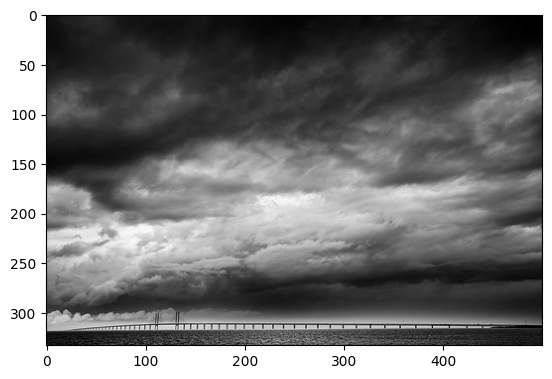

In [31]:
from matplotlib.pyplot import imread
img_path = 'weather/test/cloudy/cloudy58.jpg'
img = image.load_img(img_path,target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)
print("input image shape:",x.shape)
my_image = imread(img_path)
imshow(my_image)
print(model.predict(x))